<img src='https://www.actris.eu/sites/default/files/inline-images/Actris%20logo.png' width=200 align=right>

# ACTRIS DC 
## Access ACTRIS Data through the ACTRIS Data Portal

The goal of this notebook is to provide a guide on how to access data through the ACTRIS (Aerosols, Clouds, and Trace gases Research Infrastructure) Data Portal. By following this notebook, users will gain the necessary skills to access and utilize the atmospheric data available through the ACTRIS Data Portal. This knowledge will enable them to conduct their own research and analysis in the field of atmospheric science. The Data Portal represents a human interface to search and access of all ACTRIS data.

Let's get started!

### Import libraries

In [8]:
# Library for working with netCDF files
import xarray as xr

# Libraries for working with JSON files, making HTTP requests, and handling file system operations
import json
import requests
import os

# Library for plotting data
import matplotlib.pyplot as plt

### Access the ACTRIS Data Portal
The ACTRIS Data Portal can be accessed by pressing the image or following the link to [data.actris.eu](data.actris.eu)

<a href="https://data.actris.eu/">
    <img src='static/img/actris_data_portal.png' width='600'>
</a>


### Select the desired dataset and download **basket.json** file

Through the search you can select datasets and add them to your basket by clicking the "Add selection to basket" button. When you have the desired data in your basket, you press the "Download all basket metadata" button. This gives you a **basket.json** file. 

In this example we have selected a basket of mass concentration of organic and elemental carbon data from Birkenes I and Birkenes II.  

![Screenshots of data search, data selection and basket with "Download all basket metadata" button from ACTRIS Data Portal](https://folk.nilu.no/~lemu/shared_presentations/actris_data_portal_search_select_basket.png)

### Explore the **basket.json** file
This code section is opening a file named "basket.json" located in the "static" directory. If you do not get the code to run, please check that you have the "basket.josn" file in the directory. 

After executing these two lines of code, you can work with the contents of the JSON file using the md variable.

In [2]:
file_path = 'static/basket.json'

if not os.path.exists(file_path):
    raise FileNotFoundError(f"No such file or directory: '{file_path}'")

with open(file_path) as f:  # open the file "basket.json"
    md = json.load(f)  # load the json file

In [4]:
# Show the metadata of the first element of the dictionary

first_element = next(iter(md)) # get the key to the first element of the dictionary
md[first_element] # get the metadata of the first element of the dictionary

{'id': 204487,
 'title': 'OC/EC at Birkenes',
 'matrix': 'aerosol particle phase',
 'instrumentType': 'low volume sampler',
 'station': 'Birkenes I',
 'startTime': '2001-02-06T23:00:00.0000000Z',
 'endTime': '2009-01-06T23:00:00.0000000Z',
 'downloadUrl': 'https://thredds.nilu.no/thredds/fileServer/ebas_doi/QC/2T/UT/QC2T-UT7A.nc',
 'opendapUrl': 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/QC/2T/UT/QC2T-UT7A.nc',
 'variables': ['aerosol particle elemental carbon mass concentration',
  'aerosol particle organic carbon mass concentration',
  'aerosol particle total carbon mass concentration'],
 'pid': 'https://doi.org/10.48597/QC2T-UT7A',
 'repository': 'IN-SITU'}

### Accessing data from **basket.json**

This example includes two methods of accessing the data: 
- THREDDS Data Catalog - Opendap protocol (Streaming of data)
- THREDDS Data Catalog - HTTPS protocol (Download of data)

You only need to run one of the protocols to get the dataset in question for the analysis. 

In [5]:
protocol = 'opendap' # choose 'http' or 'opendap'

In [6]:
if protocol == 'opendap': 
    next
elif protocol == 'http': 
    # As this protocol downloads the file, we create a folder for the data
    # Create the "data_oc_ec" folder if it doesn't exist
    if not os.path.exists("static/data_oc_ec"):
        os.makedirs("static/data_oc_ec")

    for i in md: 
        r = requests.get(md[i]['downloadUrl'])
        filename = r.url[-12:]
        filepath = os.path.join("static/data_oc_ec", filename)  # Specify the folder path
        with open(filepath, mode="wb") as file:
            file.write(r.content)
else: 
    print('Please choose a valid protocol: http or opendap')

### Inspect dataset

Opening one dataset and inspecting it. The datasets are opened in netCDF format and in this example opened in xarray. 

Documentation on in-situ file formats, such as this OC/EC dataset can be found here: https://ebas.pages.nilu.no/ebas-io/fileformat_netcdf/index.html 

In [7]:
if protocol == 'opendap':
    ds = xr.open_dataset(md[first_element]['opendapUrl'])
elif protocol == 'http':
    ds = xr.open_dataset(filepath)
else:
    print('Please choose a valid protocol: http or opendap')

ds

<xarray.Dataset>
Dimensions:                             (time: 762, tbnds: 2, metadata_time: 8,
                                         elemental_carbon_pm10_qc_flags: 2,
                                         elemental_carbon_pm25_qc_flags: 2,
                                         organic_carbon_pm10_qc_flags: 2,
                                         organic_carbon_pm25_qc_flags: 2,
                                         total_carbon_pm10_qc_flags: 2,
                                         total_carbon_pm25_qc_flags: 2)
Coordinates:
  * time                                (time) datetime64[ns] 2001-02-09T18:0...
  * metadata_time                       (metadata_time) datetime64[ns] 2001-0...
Dimensions without coordinates: tbnds, elemental_carbon_pm10_qc_flags,
                                elemental_carbon_pm25_qc_flags,
                                organic_carbon_pm10_qc_flags,
                                organic_carbon_pm25_qc_flags,
                                total_carbon_pm10_qc_flags,
                                total_carbon_pm25_qc_flags
Data variables: (12/20)
    time_bnds                           (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                  (metadata_time, tbnds) datetime64[ns] ...
    elemental_carbon_pm10               (time) float64 ...
    elemental_carbon_pm10_qc            (elemental_carbon_pm10_qc_flags, time) float64 ...
    elemental_carbon_pm10_ebasmetadata  (metadata_time) |S64 ...
    elemental_carbon_pm25               (time) float64 ...
    ...                                  ...
    total_carbon_pm10                   (time) float64 ...
    total_carbon_pm10_qc                (total_carbon_pm10_qc_flags, time) float64 ...
    total_carbon_pm10_ebasmetadata      (metadata_time) |S64 ...
    total_carbon_pm25                   (time) float64 ...
    total_carbon_pm25_qc                (total_carbon_pm25_qc_flags, time) float64 ...
    total_carbon_pm25_ebasmetadata      (metadata_time) |S64 ...
Attributes: (12/90)
    Conventions:                   CF-1.8, ACDD-1.3
    featureType:                   timeSeries
    title:                         OC/EC at Birkenes
    keywords:                      mass_concentration_of_organic_carbon_in_pm...
    id:                            QC2T-UT7A.nc
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1",\n   ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

From inspecting the first dataset in the basket, we see that this is a dataset from Birkenes I from 2001 to 2009. In 2009 the measurements location of OC/EC changed to Birkenes II. The xarray package allows the user to click on and inspect different parts of the dataset such as "Data variables" og "Attributes". 

### Plot the dataset

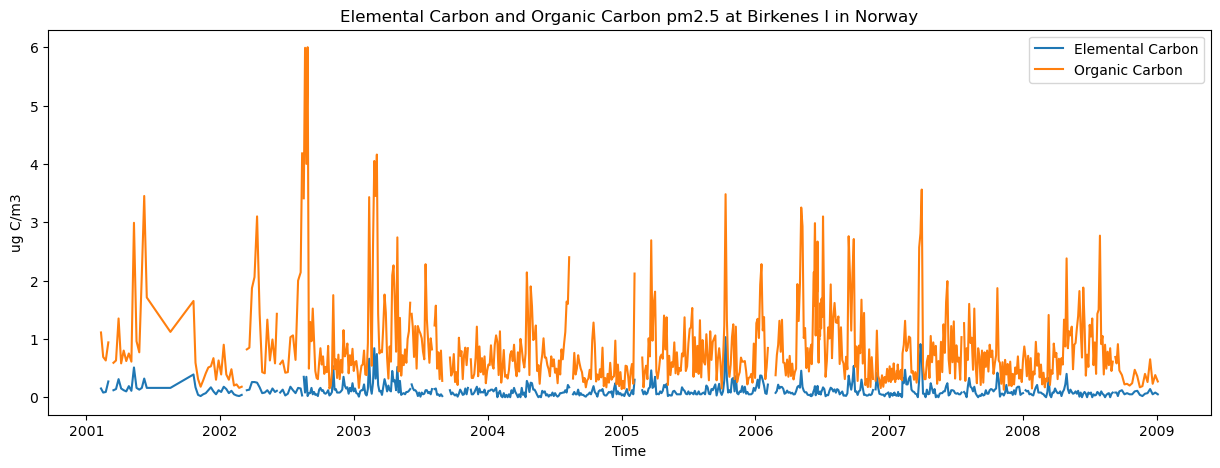

In [15]:
# Choosing the variables we want to plot from "Data variables"
ec_ds = ds.elemental_carbon_pm25 
oc_ds = ds.organic_carbon_pm25
tc_ds = ds.total_carbon_pm25

# Plotting the data
plt.figure(figsize=(15, 5))
plt.plot(ec_ds.time, ec_ds, label='Elemental Carbon')
plt.plot(oc_ds.time, oc_ds, label='Organic Carbon')
#plt.plot(tc_ds.time, tc_ds, label='Total Carbon')
plt.legend()
plt.ylabel('ug C/m3')
plt.xlabel('Time')
plt.title('Elemental Carbon and Organic Carbon pm2.5 at Birkenes I in Norway')
plt.show()

### Further analysis
To learn how to work with the full basket, i.e. all datasets of OC/EC from both Birkenes I and Birkenes II, please have a look at the "Combining datasets EC OC.ipynb" notebook under the "Search and access" folder. 